In [2]:
import numpy as np
from matplotlib.pyplot import plot, figure, show
from numba import jit
from time import time
from random import *

In [71]:
@jit
def mbrot(c, detail):
    z = 0
    for i in range(detail):
        z = z**2 + c
        if abs(z) > 2 and i >= 2:
            return i
    else:
        return True
    
@jit
def bship(c, detail):
    z = 0
    for i in range(detail):
        z = (abs(z.real)+complex(0,1)*abs(z.imag))**2 + c
        if abs(z) > 2 and i >= 2:
            return i
    else:
        return True

def plotbrot(detail, itr, area = [[-2,-1.2],[1,1.2]], red = 0.5, mode="mbrot"):
    t = time()
    x,xx,y,xy=[],[],[],[]
    dst = [area[1][a]-area[0][a] for a in [0,1]]
    for i in range(itr):
                xx.append([])
                xy.append([])
    for i in range(detail):
        for k in range(detail):
            point = complex(area[0][0]+dst[0]*i/detail,area[0][1]+dst[1]*k/detail)
            if mode == "mbrot":
                v = mbrot(point, itr)
            elif mode == "bship":
                v = bship(point, itr)
            if v == True:
                x.append(point.real)
                y.append(point.imag)
            elif type(v) == int:
                xx[v].append(point.real)
                xy[v].append(point.imag)
    fig = figure(figsize=[15,15*dst[1]/dst[0]])
    ax = fig.gca()
    for i in range(len(xx)):
            ax.plot(xx[i],xy[i],',',color=(1,1-(i/len(xx))**red,1-(i/len(xx))**red))
    #for i in range(len(xx)):
    #    ax.plot(xx[i],xy[i],',',color=([1,1][i%2],[0,1][i%2],[0,0][i%2]))
    #ax.plot([-0.2, -0.2, -0.1, -0.1, -0.2],[-1.1, -1, -1, -1.1, -1.1])
    #ax.plot([-0.1676, -0.1676, -0.1672, -0.1672, -0.1676],[-1.041, -1.0414, -1.0414, -1.041, -1.041])
    show()
    print(time() - t)

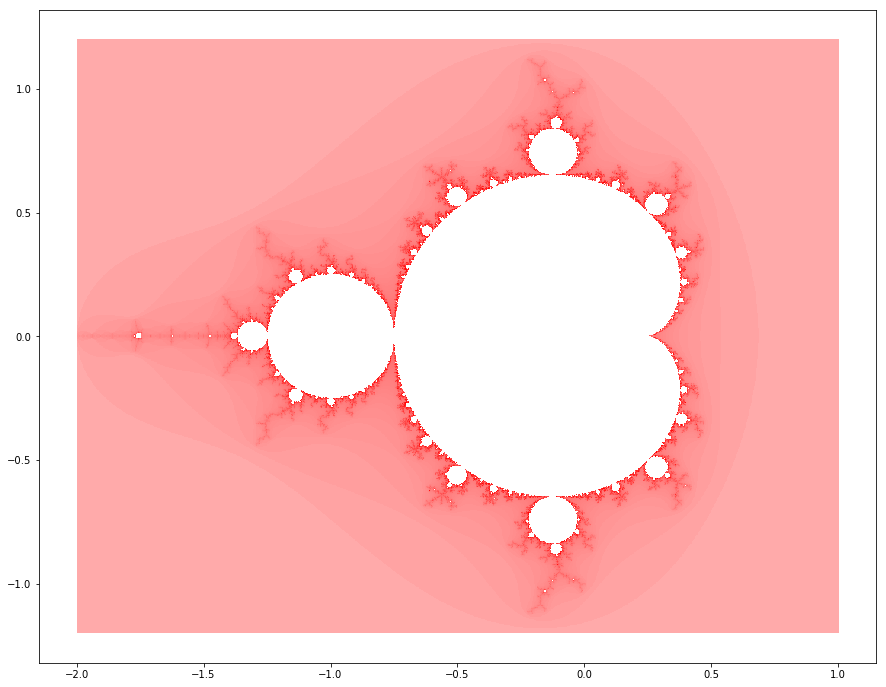

7.16142201423645


In [74]:
plotbrot(1000, 500, [[-2,-1.2],[1,1.2]], 0.2, "mbrot")
#plotbrot(1000, 500, [[-0.2, -1.1],[-0.1,-1]], 0.2, "bship")
#plotbrot(1000, 1000, [[-0.1676, -1.0414],[-0.1672,-1.041]], 0.25, "bship")